In [1]:
import matplotlib.pyplot as plt
# 한글처리
import matplotlib as mpl
mpl.rc('font',family='Malgun Gothic')
import seaborn as sns
import pandas as pd
import scipy.stats as stats

In [2]:
df_ROS = pd.read_csv('../../datasets/RecurrenceOfSurgery.csv')
df_ROS[:2]

,Unnamed: 0,환자ID,Large Lymphocyte,Location of herniation,ODI,가족력,간질성폐질환,고혈압여부,과거수술횟수,당뇨여부,...,Modic change,PI,PT,Seg Angle(raw),Vaccum disc,골밀도,디스크단면적,디스크위치,척추이동척도,척추전방위증
0,0,1PT,22.8,3,51.0,0.0,0,0,0,0,...,3,51.6,36.6,14.4,0,-1.01,2048.5,4,Down,0
1,1,2PT,44.9,4,26.0,0.0,0,0,0,0,...,0,40.8,7.2,17.8,0,-1.14,1753.1,4,Up,0


In [3]:
df_ROS.columns

Index(['Unnamed: 0', '환자ID', 'Large Lymphocyte', 'Location of herniation',
       'ODI', '가족력', '간질성폐질환', '고혈압여부', '과거수술횟수', '당뇨여부', '말초동맥질환여부', '빈혈여부',
       '성별', '스테로이드치료', '신부전여부', '신장', '심혈관질환', '암발병여부', '연령', '우울증여부', '입원기간',
       '입원일자', '종양진행여부', '직업', '체중', '퇴원일자', '헤모글로빈수치', '혈전합병증여부', '환자통증정도',
       '흡연여부', '통증기간(월)', '수술기법', '수술시간', '수술실패여부', '수술일자', '재발여부', '혈액형',
       '전방디스크높이(mm)', '후방디스크높이(mm)', '지방축적도', 'Instability', 'MF + ES',
       'Modic change', 'PI', 'PT', 'Seg Angle(raw)', 'Vaccum disc', '골밀도',
       '디스크단면적', '디스크위치', '척추이동척도', '척추전방위증'],
      dtype='object')

### 시각화 분석 접근 방식
1. 표현하는 데이터 타입
2. 시각화 종류
    - 단일변수이면서 연속형 : histplot, boxplot
    - 단일변수이면서 범주형 : barplot
    - 단일변수이면서 순서형 : lineplot
3. 현 데이터로 시각화 가능 여부
    - 한 chart에 동시 표현 여부 : 레코드가 분리 되어 있어야 함.
    - 단일변수 표현 시 주의할 점 : count 대치하는 변수 여부

In [4]:
# 필요한 변수만 추출
df_ROS_extract = df_ROS[['환자ID','입원일자', '퇴원일자']]
df_ROS_extract[:2]

,환자ID,입원일자,퇴원일자
0,1PT,20190713,20190716
1,2PT,20190715,20190716


In [5]:
# 입원일자를 string으로 type 변환
df_ROS_extract['입원일자_datetime'] = pd.to_datetime(df_ROS_extract['입원일자'].astype(str))
df_ROS_extract['퇴원일자_datetime'] = pd.to_datetime(df_ROS_extract['퇴원일자'].astype(str))

C:\Users\koreavc\AppData\Local\Temp\ipykernel_14672\404138994.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ROS_extract['입원일자_datetime'] = pd.to_datetime(df_ROS_extract['입원일자'].astype(str))
C:\Users\koreavc\AppData\Local\Temp\ipykernel_14672\404138994.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ROS_extract['퇴원일자_datetime'] = pd.to_datetime(df_ROS_extract['퇴원일자'].astype(str))


In [6]:
# 입원일자, 퇴원일자의 Dtype이 datetime으로 변경됨
# df_ROS_extract[:2]
df_ROS_extract.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1894 entries, 0 to 1893
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   환자ID           1894 non-null   object        
 1   입원일자           1894 non-null   int64         
 2   퇴원일자           1894 non-null   int64         
 3   입원일자_datetime  1894 non-null   datetime64[ns]
 4   퇴원일자_datetime  1894 non-null   datetime64[ns]
dtypes: datetime64[ns](2), int64(2), object(1)
memory usage: 74.1+ KB


### 주차별 환자 입원/퇴원 추이(평균/합계) 시각화 및 인사이트
- 표현하는 데이터 타입 : 연속형(주차별), 단일변수
- 시각화 종류 : lineplot

In [7]:
df_ROS_extract['입원일자_datetime_week'] = df_ROS_extract['입원일자_datetime'].dt.isocalendar().week
df_ROS_extract['퇴원일자_datetime_week'] = df_ROS_extract['퇴원일자_datetime'].dt.isocalendar().week

C:\Users\koreavc\AppData\Local\Temp\ipykernel_14672\3917889795.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ROS_extract['입원일자_datetime_week'] = df_ROS_extract['입원일자_datetime'].dt.isocalendar().week
C:\Users\koreavc\AppData\Local\Temp\ipykernel_14672\3917889795.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ROS_extract['퇴원일자_datetime_week'] = df_ROS_extract['퇴원일자_datetime'].dt.isocalendar().week


### 요일별 환자 입원/퇴원 추이(평균/합계) 시각화 및 인사이트
- 표현하는 데이터 타입 : 범주형, 단일변수
- 시각화 종류 : barplot
- 입원일자와 퇴원일자의 레코드가 분리되어 있지 않고 한 레코드에 들어있음(퇴원/입원 같이 표현할 수 없음)
- 레코드의 개수로 count를 해야 함

In [8]:
df_ROS_extract['입원일자_datetime_day'] = df_ROS_extract['입원일자_datetime'].dt.day_name()
df_ROS_extract['퇴원일자_datetime_day'] = df_ROS_extract['퇴원일자_datetime'].dt.day_name()

C:\Users\koreavc\AppData\Local\Temp\ipykernel_14672\1296604899.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ROS_extract['입원일자_datetime_day'] = df_ROS_extract['입원일자_datetime'].dt.day_name()
C:\Users\koreavc\AppData\Local\Temp\ipykernel_14672\1296604899.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ROS_extract['퇴원일자_datetime_day'] = df_ROS_extract['퇴원일자_datetime'].dt.day_name()


In [9]:
df_ROS_extract[:2]

,환자ID,입원일자,퇴원일자,입원일자_datetime,퇴원일자_datetime,입원일자_datetime_week,퇴원일자_datetime_week,입원일자_datetime_day,퇴원일자_datetime_day
0,1PT,20190713,20190716,2019-07-13,2019-07-16,28,29,Saturday,Tuesday
1,2PT,20190715,20190716,2019-07-15,2019-07-16,29,29,Monday,Tuesday


In [10]:
df_ROS_extract['입원일자_datetime_day'].value_counts()

Tuesday      376
Monday       329
Thursday     329
Wednesday    304
Sunday       204
Friday       204
Saturday     148
Name: 입원일자_datetime_day, dtype: int64

<Axes: xlabel='입원일자_datetime_day'>

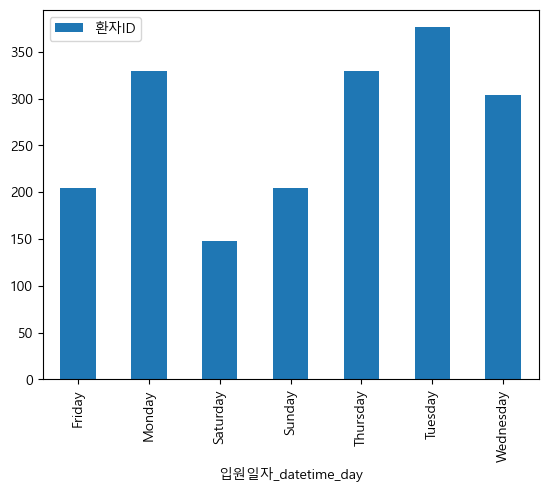

In [11]:
pd.pivot_table(data=df_ROS_extract[['입원일자_datetime_day','환자ID']], index='입원일자_datetime_day', aggfunc=len).plot(kind='bar')

In [12]:
df_ROS_extract_pivot = pd.pivot_table(data=df_ROS_extract[['입원일자_datetime_day','환자ID']], index='입원일자_datetime_day', aggfunc=len)
df_ROS_extract_pivot[:2]

,환자ID
입원일자_datetime_day,
Friday,204
Monday,329


In [13]:
# 입원일자_datetime_day를 column으로 변경하기
df_ROS_extract_pivot['입원일자_dayname'] = df_ROS_extract_pivot.index

In [14]:
df_ROS_extract_pivot

,환자ID,입원일자_dayname
입원일자_datetime_day,,
Friday,204,Friday
Monday,329,Monday
Saturday,148,Saturday
Sunday,204,Sunday
Thursday,329,Thursday
Tuesday,376,Tuesday
Wednesday,304,Wednesday


<Axes: xlabel='환자ID', ylabel='입원일자_dayname'>

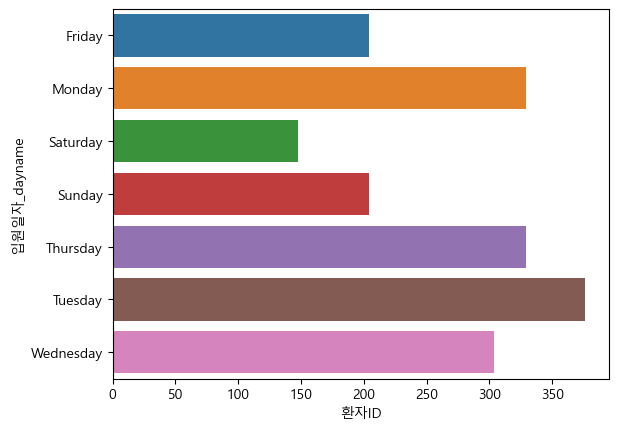

In [15]:
sns.barplot(data=df_ROS_extract_pivot, x='환자ID', y='입원일자_dayname', estimator=sum)